In [1]:
!pip install tensorflow==2.8.0
import tensorflow as tf
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 462 kB 4.0 MB/s 
     |████████████████████████████████| 1.4 MB 43.7 MB/s 
     |████████████████████████████████| 5.8 MB 38.1 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
2.8.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

Dataset link:
https://docs.google.com/spreadsheets/d/1qART38B2l_G7VkJKsjvkIFkDRekeOnTj/edit?usp=sharing&ouid=114253294372712711027&rtpof=true&sd=true

Link to trained models: https://drive.google.com/drive/folders/1lpriuUhKm6ca8c-Y1iy76SC7zzbQpXLb?usp=sharing

In [3]:
! gdown --id 1qART38B2l_G7VkJKsjvkIFkDRekeOnTj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1qART38B2l_G7VkJKsjvkIFkDRekeOnTj
To: /content/Voltage_BOI.xlsx
100% 282k/282k [00:00<00:00, 56.3MB/s]


In [4]:
df = pd.read_excel('Voltage_BOI.xlsx')
df=df.fillna(0)
df.head()

,B0('9-16'),C0('11-25'),A0('11-28'),B('11-11'),C0('9-20'),B0('9-27'),A0('10-03'),B('10-21'),C('10-24'),B('10-28'),...,B0('10-03'),C0('9-16'),C0('11-28'),C0('9-10'),C('10-30'),C(11-06'),C('11-11'),B0(9-24'),min,d
0,0.0159,0.0063,0.0061,0.0021,0.0039,0.0280,0.0103,0.0016,0.0009,0.0017,...,0.0116,0.0131,0.0046,0.0024,0.0075,0.0013,0.0013,0.0128,0.0,0.00
1,0.0582,0.0504,0.0021,0.0009,0.0052,0.0448,0.0014,0.0009,0.0008,0.0006,...,0.0022,0.0534,0.0027,0.0089,0.0046,0.0040,0.0011,0.0625,5.0,0.00
2,0.1085,0.0667,0.0036,0.0014,0.0191,0.0740,0.0010,0.0013,0.0014,0.0008,...,0.0016,0.0804,0.0060,0.0242,0.0025,0.0094,0.0027,0.1146,10.0,0.01
3,0.1339,0.0679,0.0075,0.0021,0.0500,0.0858,0.0009,0.0016,0.0024,0.0013,...,0.0017,0.1123,0.0098,0.0480,0.0064,0.0176,0.0050,0.1324,15.0,0.01
4,0.1448,0.0666,0.0133,0.0036,0.0789,0.0919,0.0010,0.0020,0.0039,0.0017,...,0.0019,0.1243,0.0154,0.0631,0.0126,0.0279,0.0078,0.1383,20.0,0.01


Definition of input and output data

In [39]:
def test_input_out_data(k):
  return np.array(df.iloc[0:k, 40:56]).transpose(), np.array(df.iloc[k:1511, 40:56]).transpose()

In [40]:
x_test_24, y_test_24 = test_input_out_data(289)

x_test_16, y_test_16 = test_input_out_data(193)

x_test_12, y_test_12 = test_input_out_data(145)

x_test_8, y_test_8 = test_input_out_data(97)

x_test_6, y_test_6 = test_input_out_data(73)

x_test_2, y_test_2 = test_input_out_data(25)

Loading Saved Models

In [13]:
def model(json_file, weights):
  with open(json_file, 'r') as f:
    loaded_model = tf.keras.models.model_from_json(f.read())
    loaded_model.load_weights(weights)
  return loaded_model

In [14]:
model24 = model('model24_indirect.json', 'weights24_indirect.h5')
model16 = model('model16_indirect.json', 'weights16_indirect.h5')
model12 = model('model12_indirect.json', 'weights12_indirect.h5')
model8 = model('model8_indirect.json', 'weights8_indirect.h5')
model6 = model('model6_indirect.json', 'weights6_indirect.h5')
model2 = model('model2_indirect.json', 'weights2_indirect.h5')

Prediction on a test sample

In [28]:
pred24 = np.array(model24(x_test_24))
pred16 = np.array(model16(x_test_16))
pred12 = np.array(model12(x_test_12))
pred8 = np.array(model8(x_test_8))
pred6 = np.array(model6(x_test_6))
pred2 = np.array(model2(x_test_2))

Graphs of real and predicted voltage

In [41]:
def plot_predict(y_test, pred, n):
  fig, ax = plt.subplots(8, 2, figsize=(10, 20))
  axs = [ax[i, j] for i in range(8) for j in range(2)]
  for i in range(0, 16):
      axs[i].plot(np.array(df.iloc[n:1511, -1].transpose()), y_test[i])
      axs[i].plot(np.array(df.iloc[n:1511, -1].transpose()), pred[i])

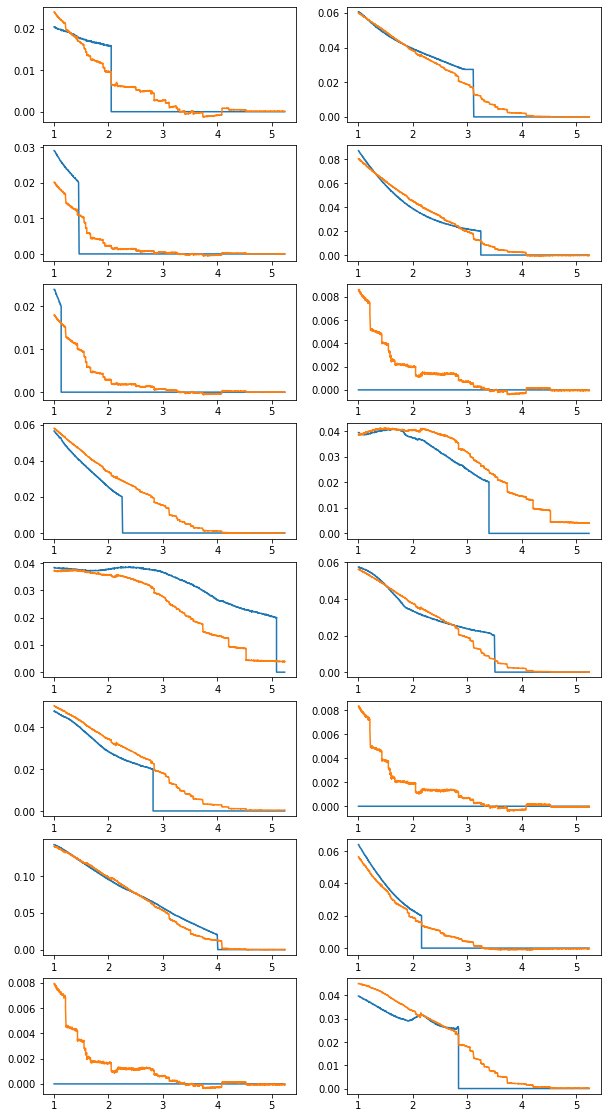

In [42]:
plot_predict(y_test_24, pred24, 289)

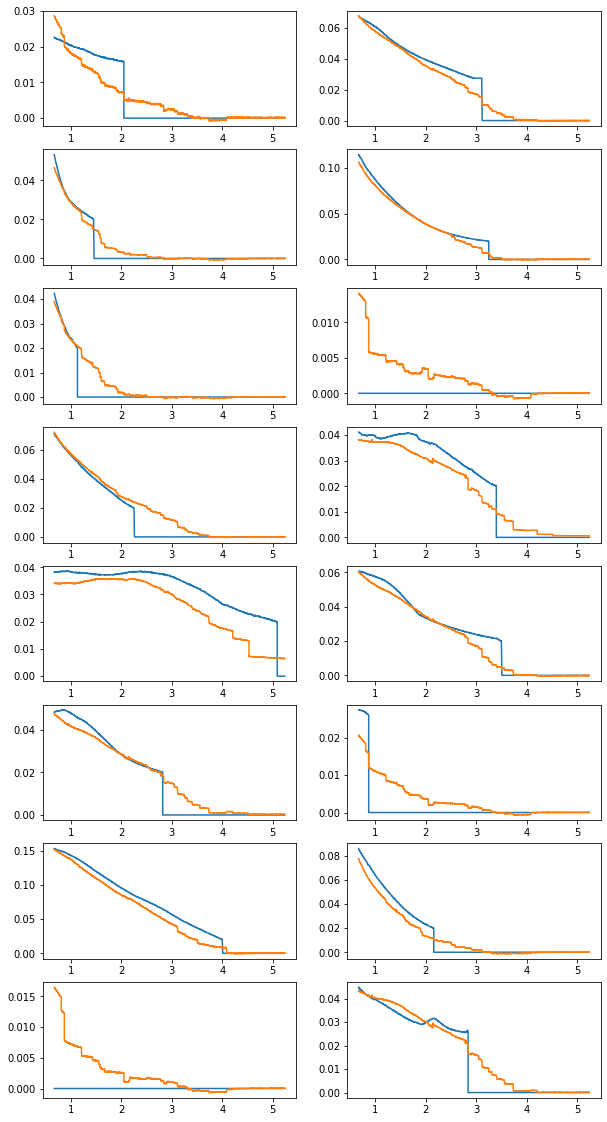

In [104]:
plot_predict(y_test_16, pred16, 193)

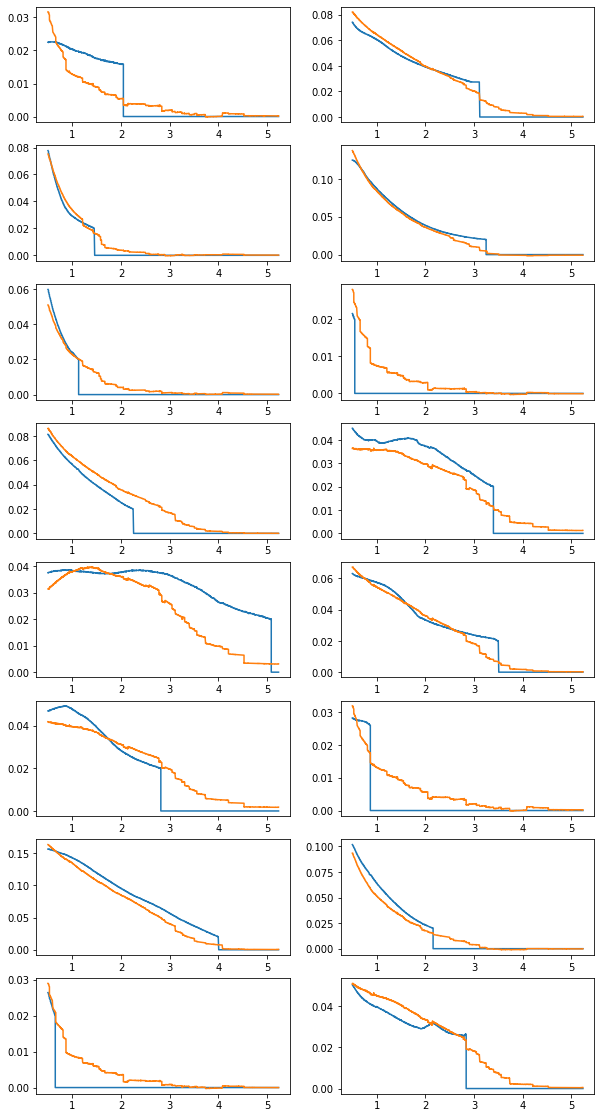

In [105]:
plot_predict(y_test_12, pred12, 145)

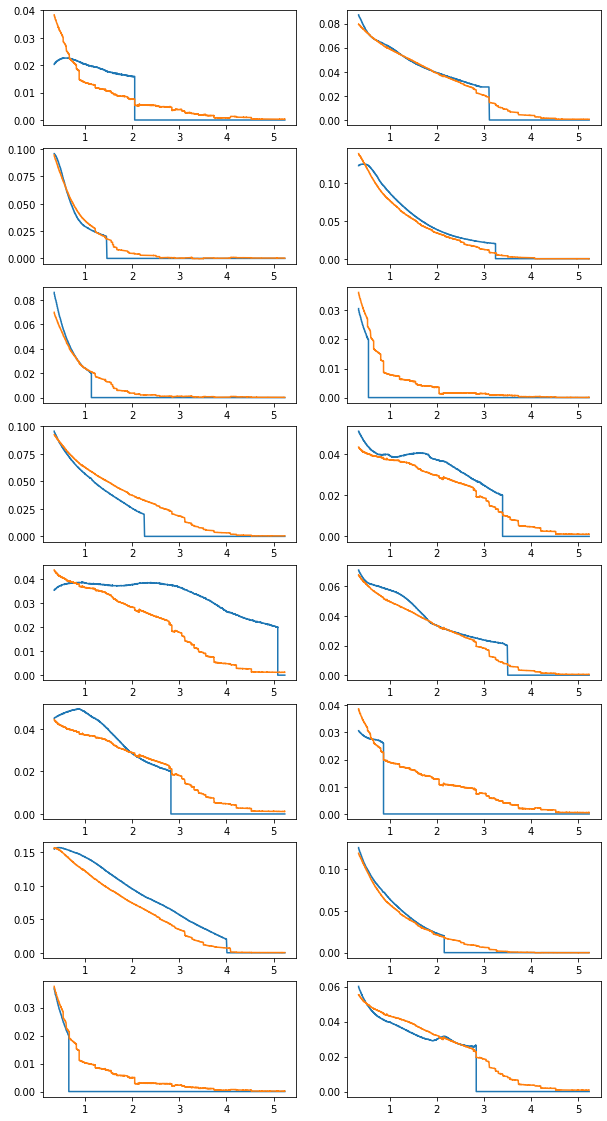

In [106]:
plot_predict(y_test_8, pred8, 97)

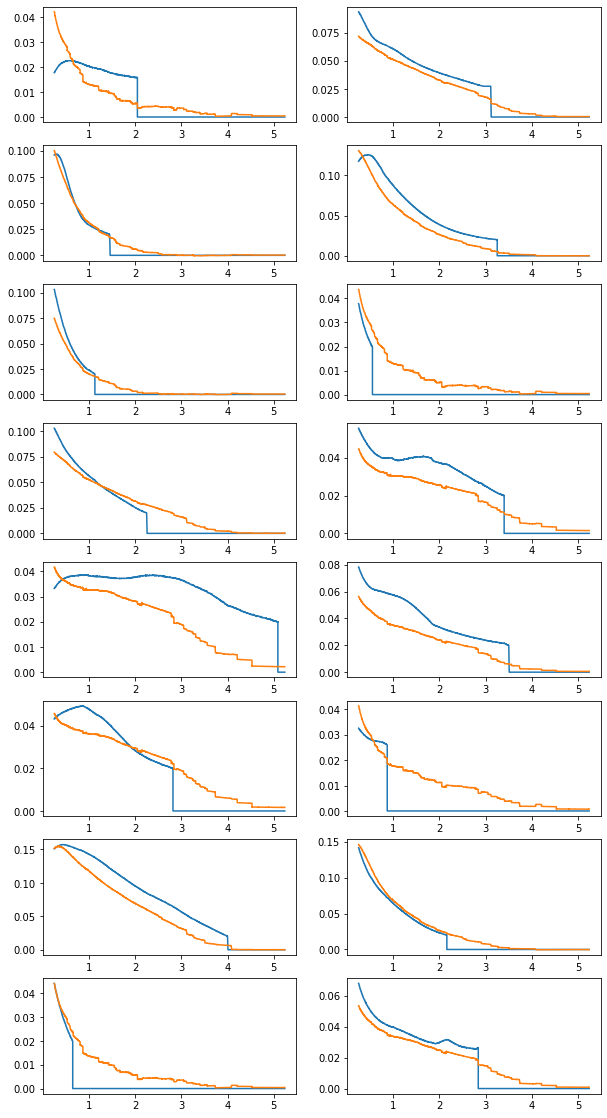

In [107]:
plot_predict(y_test_6, pred6, 73)

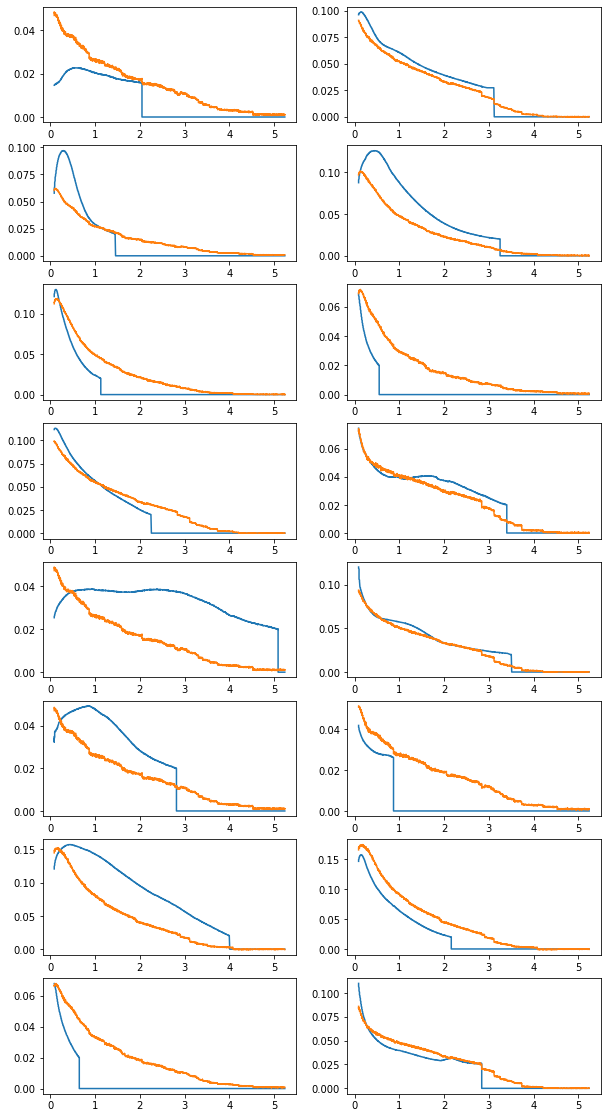

In [108]:
plot_predict(y_test_2, pred2, 25)

In [48]:
# If the predicted voltage is less than 0.01 V then do not use it
def time_k(pred):
  k = []
  for j in range(0, pred.shape[0]):
    for i in range(0, pred.shape[1]):
      if pred[j, i] <= 0.01:
        k.append(i)
        break
      if i == pred.shape[1]-1:
        k.append(pred.shape[1])
  return k

In [49]:
# If the predicted voltage is less than 0.01 V then do not use it
k24 = time_k(pred24)
k16 = time_k(pred16)
k12 = time_k(pred12)
k8 = time_k(pred8)
k6 = time_k(pred6)
k2 = time_k(pred2)

In [50]:
# seconds
second = np.array(df.iloc[:1511, -2]*60)

In [51]:
# Integral to get the charge
def left_rect(x, f):
  Q=[]
  SUM_Q = 0
  for i in range(1, f.shape[0]):
    SUM_Q+=((x[i]-x[i-1])*f[i-1])
    Q.append(SUM_Q)
  return Q

In [55]:
def Q(x_test, y_test, pred, k):
  # charge received at predicted voltage
  Q_pred = np.array([left_rect(second, np.concatenate([x_test[i], pred[i][0:k[i]]])/100) for i in range(0, 16)])

  # charge received at real voltage
  Q_real = np.array([left_rect(second, np.concatenate([x_test[i], y_test[i][0:k[i]]])/100) for i in range(0, 16)])
  return Q_pred, Q_real

In [57]:
Q_pred24, Q_real24 = Q(x_test_24, y_test_24, pred24, k24)
Q_pred16, Q_real16 = Q(x_test_16, y_test_16, pred16, k16)
Q_pred12, Q_real12 = Q(x_test_12, y_test_12, pred12, k12)
Q_pred8, Q_real8 = Q(x_test_8, y_test_8, pred8, k8)
Q_pred6, Q_real6 = Q(x_test_6, y_test_6, pred6, k6)
Q_pred2, Q_real2 = Q(x_test_2, y_test_2, pred2, k2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


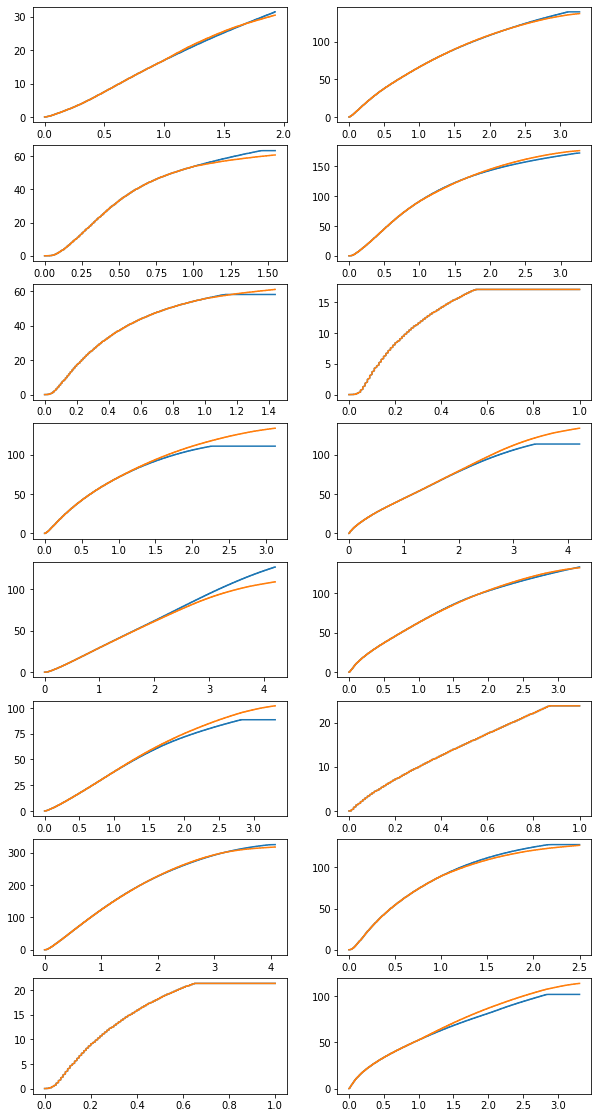

In [111]:
# blue = real charge, orange - predicted charge
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 16):
    axs[i].plot(np.array(df.iloc[1:289+k24[i], -1].transpose()), Q_real24[i])
    axs[i].plot(np.array(df.iloc[1:289+k24[i], -1].transpose()), Q_pred24[i])

In [47]:
# formulas for the linear dependence of BOD and charge
def A_0(Q):
  x = (Q + 39.478)/9.862
  return x

def A_1(Q):
  x = (Q + 16.548)/7.9411
  return x

def B_0(Q):
  x = (Q + 41.036)/9.9758
  return x

def B_1(Q):
  x = (Q + 10.56)/7.9659
  return x

def C_0(Q):
  x = (Q + 30.168)/8.7912 
  return x

def C_1(Q):
  x = (Q + 18.662)/7.3071
  return x

In [58]:
# real BOD
y_test  = np.array(df.iloc[1511, 40:56]).transpose()
y_test = y_test.astype('float64')

In [59]:
# BOD out of charge
def BOD5_pred(Q_pred):
  BOI0 = B_0(Q_pred[0][-1])
  BOI1 = A_0(Q_pred[1][-1])
  BOI2 = A_1(Q_pred[2][-1])
  BOI3 = A_1(Q_pred[3][-1])
  BOI4 = A_1(Q_pred[4][-1])
  BOI5 = A_1(Q_pred[5][-1])
  BOI6 = A_1(Q_pred[6][-1])
  BOI7 = B_0(Q_pred[7][-1])
  BOI8 = B_0(Q_pred[8][-1])
  BOI9 = C_0(Q_pred[9][-1])
  BOI10 = C_0(Q_pred[10][-1])
  BOI11 = C_0(Q_pred[11][-1])
  BOI12 = C_1(Q_pred[12][-1])
  BOI13 = C_1(Q_pred[13][-1])
  BOI14 = C_1(Q_pred[14][-1])
  BOI15 = B_0(Q_pred[15][-1])
  BOI = [BOI0, BOI1, BOI2, BOI3, BOI4, BOI5, BOI6, BOI7, BOI8, BOI9, BOI10, BOI11, BOI12, BOI13, BOI14, BOI15]
  return BOI

In [60]:
# BOD out of charge
BOI24 = BOD5_pred(Q_pred24)
BOI16 = BOD5_pred(Q_pred16)
BOI12 = BOD5_pred(Q_pred12)
BOI8 = BOD5_pred(Q_pred8)
BOI6 = BOD5_pred(Q_pred6)
BOI2 = BOD5_pred(Q_pred2)

In [102]:
# error predict
def print_error(y, pred):
  print(mean_absolute_error(y, pred))
  print(mean_absolute_percentage_error(y, pred))
  TEST_MAE = []
  for i in range(0, 16):
    TEST_MAE.append(abs(y[i]-pred[i]))
  print(np.array(TEST_MAE).max())
  print(r2_score(y, pred))
  print(' ')

In [103]:
# error predict
print_error(y_test, BOI24)
print_error(y_test, BOI16)
print_error(y_test, BOI12)
print_error(y_test, BOI8)
print_error(y_test, BOI6)
print_error(y_test, BOI2)

1.0619694764910572
0.07504239050275463
4.4932849756415525
0.976489193215387
 
1.3586553232071368
0.08427190802748555
4.6993786287006145
0.9610458346516437
 
1.6020557862342306
0.10663765750358335
5.536286847936497
0.9460367473638042
 
1.936342238283747
0.11953742154273593
8.727330763237035
0.9078939978038489
 
2.5233874911705896
0.1562556174347708
10.327228547863314
0.8677282479653917
 
5.343248307100096
0.42860917309397817
20.066663828947366
0.4835087267408452
 


In [117]:
y_test[0]

7.12

BOD > 220 pollution

from liters to 60, 50, 40 ml

In [120]:
BOD = [(220 * 40)/ 1000, (220 * 60)/ 1000, (220 * 60)/ 1000, \
       (220 * 60)/ 1000, (220 * 60)/ 1000, (220 * 60)/ 1000, \
       (220 * 60)/ 1000, (220 * 60)/ 1000, (220 * 60)/ 1000, \
       (220 * 60)/ 1000, (220 * 60)/ 1000, (220 * 40)/ 1000, \
       (220 * 60)/ 1000, (220 * 60)/ 1000, (220 * 60)/ 1000, (220 * 50)/ 1000]

In [127]:
len(BOD)

16

In [128]:
def pollution(y_test):
  pollution = []
  pred_pollution = []
  for i in range(0, 16):
    if y_test[i] > BOD[i]:
      pollution.append(1)
    else:
      pollution.append(0)
  return np.array(pollution)

In [129]:
pol = pollution(y_test)
pred_pol24 = pollution(BOI24)
pred_pol16= pollution(BOI16)
pred_pol12 = pollution(BOI12)
pred_pol8 = pollution(BOI8)
pred_pol6 = pollution(BOI6)
pred_pol2 = pollution(BOI2)

In [134]:
def count(pred_pol):
  c = 0
  for i in range(0, 16):
    if pred_pol[i] == pol[i]:
      c = c+1
  return c

In [130]:
def count_1(pred_pol):
  c = 0
  for i in range(0, 16):
    if pol[i] == 1:
      if pred_pol[i] == pol[i]:
        c = c+1
  return c

In [131]:
def count_0(pred_pol):
  c = 0
  for i in range(0, 16):
    if pol[i] == 0:
      if pred_pol[i] == pol[i]:
        c = c+1
  return c

sensitivity

In [132]:
print(count_1(pred_pol24) / pol[pol == 1].size)
print(count_1(pred_pol16) / pol[pol == 1].size)
print(count_1(pred_pol12) / pol[pol == 1].size)
print(count_1(pred_pol8) / pol[pol == 1].size)
print(count_1(pred_pol6) / pol[pol == 1].size)
print(count_1(pred_pol2) / pol[pol == 1].size)

1.0
1.0
1.0
0.9
0.8
0.8


specificity

In [133]:
print(count_0(pred_pol24) / pol[pol == 0].size)
print(count_0(pred_pol16) / pol[pol == 0].size)
print(count_0(pred_pol12) / pol[pol == 0].size)
print(count_0(pred_pol8) / pol[pol == 0].size)
print(count_0(pred_pol6) / pol[pol == 0].size)
print(count_0(pred_pol2) / pol[pol == 0].size)

1.0
1.0
1.0
1.0
1.0
0.5


accuracy

In [135]:
print(count(pred_pol24) / pol.size)
print(count(pred_pol16) / pol.size)
print(count(pred_pol12) / pol.size)
print(count(pred_pol8) / pol.size)
print(count(pred_pol6) / pol.size)
print(count(pred_pol2) / pol.size)

1.0
1.0
1.0
0.9375
0.875
0.6875
